In [1]:
import os
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from pathlib import Path
from collections import namedtuple

In [122]:
def distance(point1,point2):
    '''
    Compute euclidian distance between 2 2D points
    input -> point1: 2D numpy array 
             point2: 2D numpy array
             
    output -> distance : float
              distance between point1 and point2
    '''
    
    xdiff = point1[0] - point2[0]
    ydiff = point1[1] - point2[1]
    dist = np.sqrt(xdiff*xdiff + ydiff*ydiff)
    return dist

def distance_confusion_matrix(body_tracking,speed_threshold = 10):
    
    ## define body_speed
    body_diff = np.diff(body_tracking,axis = 0)
    print(body_diff.shape)
    body_diff2 = body_diff*body_diff
    print(body_diff2.shape)
    body_speed = np.array([np.sqrt(body_diff[:,i*3]+body_diff[:,i*3+1]) for i in range(12)])
    print(body_speed.shape)
    speed_jumps = []
    for i in range(body_speed.shape[0]):
        swaps = np.where(body_speed[i,:] > speed_threshold)[0]
        speed_jumps.append(swaps)
    
    confusion_distance_matrix = np.zeros((body_speed.shape[0],body_speed.shape[0]))
    for i in range(body_speed.shape[0]):
        body_jump_parts = np.array([body_tracking[speed_jumps[i],j*3:j*3+2] for j in range(body_speed.shape[0])]) 
        for time_jump in range(body_jump_parts.shape[1]):
            min_distance = 1000
            point1 = body_jump_parts[i,time_jump,:]
            for j in range(body_speed.shape[0]):
                point2 = body_jump_parts[j,time_jump,:]
                body_part_distance = distance(point1,point2)
                if body_part_distance > 0 and body_part_distance < min_distance:
                    confusion_pair = j
                    min_distance = body_part_distance
            confusion_distance_matrix[i,confusion_pair] +=1
    
    return confusion_distance_matrix

In [79]:
## load tracking information
tracking_path = Path('/home/melisa/Documents/social_interaction/')
tracking_path.exists()
input_file_name = 'full_session/m57697-full_bias09_off1.csv'
#input_file_name_bias  = 'raw180sDLC_resnet50_ANewGenerationMay12shuffle1_320000_08BIAS.csv'

tracking_DFrame_all = pd.read_csv(tracking_path / input_file_name)
#tracking_DFrame_bias = pd.read_csv(tracking_path / input_file_name_bias)
#tracking_DFrame

In [80]:
## get body parts from tracking fil
body_parts = [tracking_DFrame_all.iloc[0][i*3+1] for i in range(int(len(tracking_DFrame.iloc[0])/3))]
body_part_structure = [tracking_DFrame_all.iloc[1][i+1] for i in range(3)]

In [123]:
# convert tracking pandas to numpy
tracking_DFrame = tracking_DFrame_all.iloc[2:]
tracking_DFrame = tracking_DFrame.astype(float)
tracking_data = tracking_DFrame.to_numpy()


body_tracking = tracking_data[:,1+5*3:];
print('Body tracking shape: ' + f'{body_tracking.shape}')
SPEED_THRESHOLD = 5
confusion_matrix = distance_confusion_matrix(body_tracking,speed_threshold = SPEED_THRESHOLD)
# tracking_DFrame_bias = tracking_DFrame_bias.iloc[2:]
# tracking_DFrame_bias = tracking_DFrame_bias.astype(float)
# tracking_data_bias = tracking_DFrame_bias.to_numpy()

Body tracking shape: (19876, 36)
(19875, 36)
(19875, 36)
(12, 19875)


/home/melisa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt
/home/melisa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater


/home/melisa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


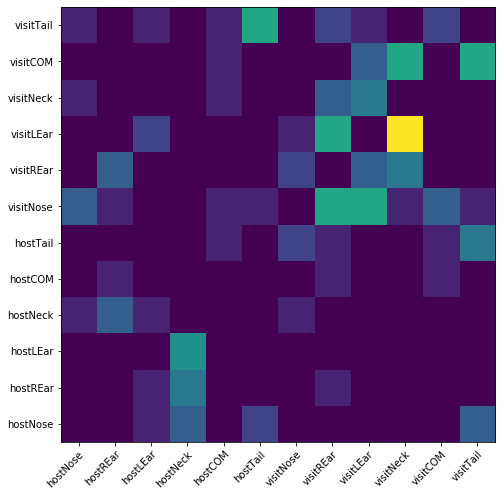

In [130]:
fig, ax = plt.subplots(figsize = (8,8))
ax.imshow(confusion_matrix)
ax.set_xticks([n for n in range(12)])
ax.set_yticks([n for n in range(12)])
ax.set_xticklabels(body_parts[5:])
ax.set_xlim(-.5, 11.5)
ax.set_ylim(-.5, 11.5)
ax.set_yticklabels(body_parts[5:]);
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor');
